# CE 93: Engineering Data Analysis
# Project Example


**Full Name:** *replace text here*

## Load the required libraries 

The following code loads the required libraries.

In [1]:
# import python library / packages 
import numpy as np                                 # ndarrays for gridded data
import pandas as pd                                # DataFrames for tabular data
import matplotlib.pyplot as plt                    # plotting
import random                                      # random sampling
from scipy.stats import *                          # common distributions, t-test
import statistics as stats                         # statistics like mode
from sklearn.linear_model import LinearRegression  # linear regression
import statsmodels.api as sm                       # linear regression

# Example 1

## Introduction 

It is generally agreed that weather, and particularly temperature, affect our residential electricity usage. For example, residents of hot regions generally observe higher electricity bills in the summer, which is driven by increased demand for cooling. In this report, we will examine this association between daily electric consumption and weather conditions in detail. Particularly, we will look at the effects of temperature on daily electric consumption. For this purpose, I selected two data sets: (1) my electricity usage data in Austin for 2020 and (2) weather conditions in Austin for 2020. 

The electricity usage data was obtained from the City of Austin Utilities Online website. Anyone can access and download their electricity usage data between any two dates in csv format. The second data set was obtained from the Weather Underground website (https://www.wunderground.com/), and includes information such as maximum, average, and minimum temperatures in °F and total precipitation in inches for each day in 2020. The main question that we will explore in this report is: does the electric consumption increase with temperature?

A glimpse of the data is shown below. The variables that are particularly of interest to us are `Date`, which is the day of the year, `Electric_usage`, which is the daily electric use in kWh, and `Avg_Temp`, which is the average daily temperature in °F.

These are all the features:

|Feature|Units|Description|
|:-|:-|:-|
|Date|N/A|Day of the year|
|Electric_usage|kWh|Total daily electric use|
|Avg_Temp|°F|Average daily temperature|

In [2]:
# read a .csv file in as a DataFrame
df = pd.read_csv('Data.csv')

# returns the first 5 rows of the data set by default
df.head()

,Date,Electric_usage,Avg_Temp
0,1/1/2020,0.97,57
1,1/2/2020,1.07,61
2,1/3/2020,1.18,66
3,1/4/2020,1.01,71
4,1/5/2020,1.33,74


In [3]:
# get the shape (rows, columns)
rows, columns = df.shape

# Print the number of rows and columns
print('The data set has ' + str(rows) + ' rows and ' + str(columns) + ' columns.')

The data set has 366 rows and 3 columns.


# Example 2: Ke's household

In [6]:
# Import datasets

# Data 1: weather data
weather_df = pd.read_excel('Weather_Oakland.xlsx')
# Data 2: electricity data
e_df = pd.read_csv('Ke_pge_electric_interval_data.csv')  

In [8]:
weather_df.head()

,Month,Day,Tem_Max,Tem_Avg,Tem_Min
0,7,1,85,67.7,55
1,7,2,77,67.9,59
2,7,3,67,61.3,57
3,7,4,67,60.1,56
4,7,5,68,61.2,57


In [9]:
e_df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2023-07-01,00:00,00:59,0.40,kWh,$0.15,NaN
1,Electric usage,2023-07-01,01:00,01:59,0.11,kWh,$0.04,NaN
2,Electric usage,2023-07-01,02:00,02:59,0.10,kWh,$0.04,NaN
3,Electric usage,2023-07-01,03:00,03:59,0.09,kWh,$0.03,NaN
4,Electric usage,2023-07-01,04:00,04:59,0.09,kWh,$0.03,NaN


In [15]:
e_df_day = e_df.groupby('DATE')['USAGE'].sum().reset_index()
e_df_day['Month']=e_df_day['DATE'].agg(lambda x: int(x.split('-')[1]))
e_df_day['Day']=e_df_day['DATE'].agg(lambda x: int(x.split('-')[2]))
e_df_day.head()

,DATE,USAGE,Month,Day
0,2023-07-01,5.67,7,1
1,2023-07-02,6.82,7,2
2,2023-07-03,4.06,7,3
3,2023-07-04,8.91,7,4
4,2023-07-05,4.90,7,5


In [38]:
# Merge two dataset
all_df = weather_df.merge(e_df_day[['Month', 'Day','USAGE']],on=['Month','Day'],how='inner')
all_df['Date']=all_df.apply(lambda x: str(int(x['Month']))+'/'+str(int(x['Day'])),axis=1)
all_df

,Month,Day,Tem_Max,Tem_Avg,Tem_Min,USAGE,Date
0,7,1,85,67.7,55,5.67,7/1
1,7,2,77,67.9,59,6.82,7/2
2,7,3,67,61.3,57,4.06,7/3
3,7,4,67,60.1,56,8.91,7/4
4,7,5,68,61.2,57,4.90,7/5
...,...,...,...,...,...,...,...
111,10,20,67,61.5,59,6.10,10/20
112,10,21,70,62.0,52,6.68,10/21
113,10,22,67,63.5,60,6.52,10/22
114,10,23,68,62.1,58,5.11,10/23


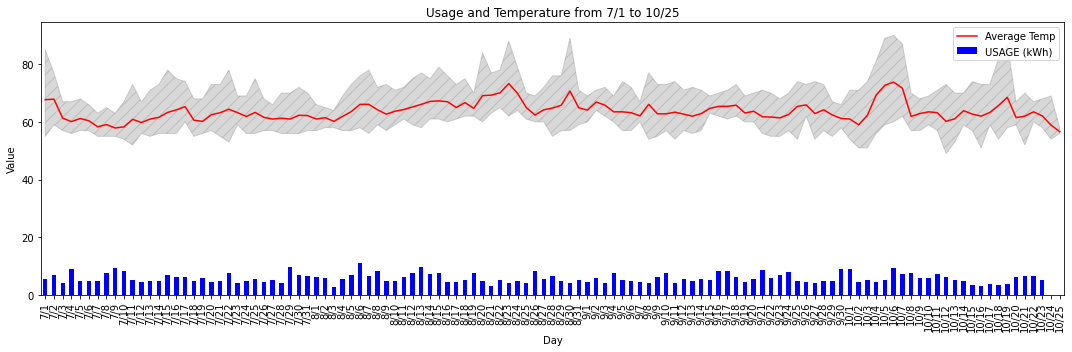

In [37]:
fig, ax = plt.subplots(figsize=(15,5))

# Bar plot for USAGE
all_df.plot(kind='bar', x='Date', y='USAGE', ax=ax, color='blue', label='USAGE (kWh)')

# Red line plot for average temperature
all_df.plot(kind='line', x='Date', y='Tem_Avg', ax=ax, color='red', label='Average Temp')

# Hatched region for temperature range (from min to max)
ax.fill_between(all_df['Date'], all_df['Tem_Min'], all_df['Tem_Max'], color='gray', alpha=0.3, hatch='//')

# Set labels and title
ax.set_xlabel("Day")
ax.set_ylabel("Value")
ax.set_title("Usage and Temperature from 7/1 to 10/25")
ax.set_xticklabels(all_df['Date'], rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

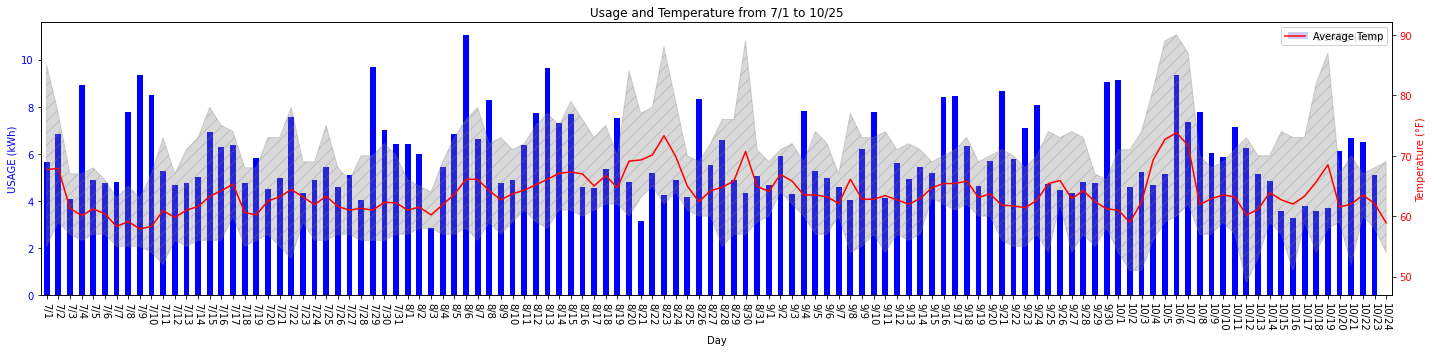

In [40]:
fig, ax1 = plt.subplots(figsize=(20,5))

# Bar plot for USAGE on left y-axis
all_df.plot(kind='bar', x='Date', y='USAGE', ax=ax1, color='blue', label='USAGE (kWh)')

# Set labels and title for USAGE
ax1.set_xlabel("Day")
ax1.set_ylabel("USAGE (kWh)", color='blue')
ax1.set_title("Usage and Temperature from 7/1 to 10/25")
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis for temperature
ax2 = ax1.twinx()

# Red line plot for average temperature on right y-axis
all_df.plot(kind='line', x='Date', y='Tem_Avg', ax=ax2, color='red', label='Average Temp')
# Hatched region for temperature range (from min to max)
ax2.fill_between(all_df['Date'], all_df['Tem_Min'], all_df['Tem_Max'], color='gray', alpha=0.3, hatch='//')

# Setting ylabel for temperature and adjusting its color
ax2.set_ylabel("Temperature (°F)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-tick rotation
ax1.set_xticks(all_df['Date'].tolist())
ax1.set_xticklabels(all_df['Date'].tolist(), rotation=270)

plt.tight_layout()
plt.show()
